In [21]:
import numpy as np
import pandas as pd
from PIL import Image as im
import matplotlib.pyplot as plt

In [22]:
"""test_df = pd.read_csv(r'D:\academics\SEM5\ML\PROJECT\test.csv')
test_new_df = []
for j in range(test_df.shape[0]):
    x = test_df['pixels'][j]
    x = x.split(' ')
    for i in range(len(x)):
        x[i] = int(x[i])
    test_new_df.append(x)
test_final_df = pd.DataFrame(test_new_df)
test_final_df.head()
test_final_df.to_csv('final_test.csv')"""

final_df = pd.read_csv(r'D:\academics\SEM5\ML\final_train.csv')

In [23]:
X = final_df.drop(columns = ['emotion'])
X.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,70,80,82,72,58,58,60,63,54,58,...,159,182,183,136,106,116,95,106,109,82
1,151,150,147,155,148,133,111,140,170,174,...,105,108,95,108,102,67,171,193,183,184
2,231,212,156,164,174,138,161,173,182,200,...,104,138,152,122,114,101,97,88,110,152
3,24,32,36,30,32,23,19,20,30,41,...,174,126,132,132,133,136,139,142,143,142
4,4,0,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30


In [24]:
X = X.to_numpy()

In [25]:
X.shape

(28709, 2304)

In [42]:
x_temp = np.reshape(X,(28709,48,48,1))
x_temp = x_temp/255

In [27]:
y = final_df['emotion']

In [28]:
y = y.to_numpy()

In [29]:
b = np.zeros((y.size, y.max()+1))
b[np.arange(y.size),y] = 1
b[0]

array([1., 0., 0., 0., 0., 0., 0.])

In [30]:
validation_data,validation_label = x_temp[:2870],b[:2870]
train_data,train_label = x_temp[2870:],b[2870:]


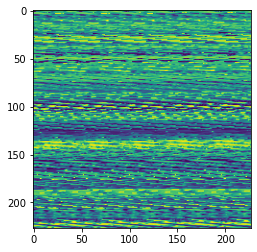

In [41]:
plt.imshow(train_data[10,:,:,0])
#plt.imshow(x_temp[0,:,:,0])

#### USE X_TEMP FOR NEURAL NETWORKS and X for LOGISTIC REGRESSION

array([1., 0., 0., 0., 0., 0., 0.])

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()

In [17]:
model.add(Conv2D(256, kernel_size=3, activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(7, activation='softmax'))

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.fit(x_temp[0:5000], b[0:5000], epochs=10)

Epoch 1/10
157/157 [==============================] - 25s 120ms/step - loss: 1.8295 - accuracy: 0.2466
Epoch 2/10
157/157 [==============================] - 18s 114ms/step - loss: 1.7767 - accuracy: 0.2642
Epoch 3/10
157/157 [==============================] - 18s 114ms/step - loss: 1.6827 - accuracy: 0.3326
Epoch 4/10
157/157 [==============================] - 18s 114ms/step - loss: 1.5886 - accuracy: 0.3804
Epoch 5/10
157/157 [==============================] - 18s 114ms/step - loss: 1.4827 - accuracy: 0.4314
Epoch 6/10
157/157 [==============================] - 18s 117ms/step - loss: 1.3417 - accuracy: 0.4980
Epoch 7/10
157/157 [==============================] - 19s 119ms/step - loss: 1.0828 - accuracy: 0.5948
Epoch 8/10
157/157 [==============================] - 20s 125ms/step - loss: 0.6826 - accuracy: 0.7578
Epoch 9/10
157/157 [==============================] - 22s 139ms/step - loss: 0.3207 - accuracy: 0.8900
Epoch 10/10
157/157 [==============================] - 27s 170ms/step - l

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 256)       2560      
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 128)       295040    
                                                                 
 conv2d_2 (Conv2D)           (None, 42, 42, 64)        73792     
                                                                 
 conv2d_3 (Conv2D)           (None, 40, 40, 32)        18464     
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 7)                 358407    
                                                                 
Total params: 748,263
Trainable params: 748,263
Non-trai

In [23]:
model.fit(x_temp, b, epochs=10)

Epoch 1/10
898/898 [==============================] - 144s 161ms/step - loss: 1.8542 - accuracy: 0.2548
Epoch 2/10
898/898 [==============================] - 181s 202ms/step - loss: 1.4471 - accuracy: 0.4590
Epoch 3/10
898/898 [==============================] - 155s 172ms/step - loss: 1.1445 - accuracy: 0.5848
Epoch 4/10
898/898 [==============================] - 140s 156ms/step - loss: 0.8512 - accuracy: 0.6951
Epoch 5/10
898/898 [==============================] - 128s 142ms/step - loss: 0.5398 - accuracy: 0.8120
Epoch 6/10
898/898 [==============================] - 120s 134ms/step - loss: 0.2993 - accuracy: 0.9002
Epoch 7/10
898/898 [==============================] - 117s 130ms/step - loss: 0.1769 - accuracy: 0.9434
Epoch 8/10
898/898 [==============================] - 116s 129ms/step - loss: 0.1217 - accuracy: 0.9658
Epoch 9/10
898/898 [==============================] - 114s 127ms/step - loss: 0.1027 - accuracy: 0.9733
Epoch 10/10
898/898 [==============================] - 114s 127m

In [29]:
test_df = pd.read_csv(r'D:\academics\SEM5\ML\final_test.csv')

In [30]:
X_test = test_df
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,254,254,254,254,254,249,255,160,2,58,...,90,92,99,84,22,0,0,42,129,180
1,156,184,198,202,204,207,210,212,213,214,...,201,199,197,193,188,184,180,172,167,161
2,69,118,61,60,96,121,103,87,103,88,...,93,93,92,90,92,93,92,88,87,90
3,205,203,236,157,83,158,120,116,94,86,...,207,211,213,206,196,181,112,43,82,86
4,87,79,74,66,74,96,77,80,80,84,...,33,32,33,35,38,40,45,41,34,32


In [31]:
X_test = X_test.to_numpy()
X_test.shape

(7178, 2304)

In [32]:
x_temp_test = np.reshape(X_test,(7178,48,48,1))
x_temp_test = x_temp_test/255

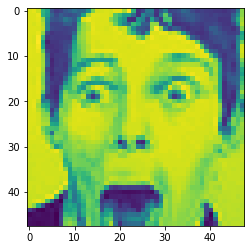

In [71]:
plt.imshow(x_temp_test[6759])

###### x_temp_test[450].shape

In [72]:
sample = np.reshape(x_temp_test[6759],(1,48,48,1))
sample.shape

(1, 48, 48, 1)

In [73]:
res = model.predict(sample)

In [74]:
print(res)

[[1.5201053e-08 2.3973010e-24 4.3947995e-04 4.8663540e-14 4.4357265e-07
  9.9955803e-01 1.9705215e-06]]


In [75]:
print(np.argmax(res))

5


In [62]:
import keras,os
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

In [71]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="data",target_size=(224,224))

Found 28709 images belonging to 7 classes.


In [72]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [73]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [74]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [75]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_20 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_21 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_22 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

In [76]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=100,generator=traindata,epochs=100,callbacks=[checkpoint,early])

C:\Users\SATYADEV\AppData\Local\Temp/ipykernel_1528/3820259329.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(steps_per_epoch=100,generator=traindata,epochs=100,callbacks=[checkpoint,early])


Epoch 1/100


KeyboardInterrupt: 